# Predict Next set of Text from a Irish Lyrics Song

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Load the data

data = open('resources/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [6]:
# Build the tokenizer on the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(f"Total Words - {total_words}")

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [8]:
# Prepare the data for modelling

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [10]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(total_words, activation=tf.nn.softmax)
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
model.summary()

2021-12-14 13:25:56.026635: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Now train the model
history = model.fit(xs, ys, epochs=100, verbose=1)

2021-12-14 13:37:03.912770: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
377/377 [==============================] - 14s 29ms/step - loss: 6.8620 - accuracy: 0.0536
Epoch 2/100
377/377 [==============================] - 11s 30ms/step - loss: 5.6949 - accuracy: 0.1158
Epoch 3/100
377/377 [==============================] - 11s 29ms/step - loss: 4.7836 - accuracy: 0.1704
Epoch 4/100
377/377 [==============================] - 11s 29ms/step - loss: 3.7857 - accuracy: 0.2546
Epoch 5/100
377/377 [==============================] - 11s 29ms/step - loss: 2.9371 - accuracy: 0.3700
Epoch 6/100
377/377 [==============================] - 11s 30ms/step - loss: 2.3044 - accuracy: 0.4857
Epoch 7/100
377/377 [==============================] - 12s 31ms/step - loss: 1.8374 - accuracy: 0.5727
Epoch 8/100
377/377 [==============================] - 11s 30ms/step - loss: 1.5035 - accuracy: 0.6414
Epoch 9/100
377/377 [==============================] - 12s 32ms/step - loss: 1.2290 - accuracy: 0.7126
Epoch 10/100
377/377 [==============================] - 12s 31ms/step - l

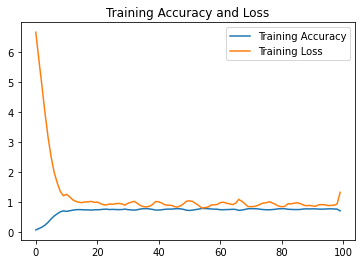

In [14]:
# Visualize the accuracy and corresponding loss
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.title("Training Accuracy and Loss")
plt.legend()
plt.show()

In [15]:
# Run an unseen prediction

seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax((model.predict(token_list)), axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this for are heart my love and bravry will find him on lying am lying row row their town today at gone and keep me toe and she filled them up with water he fall upon o o them fashions we a fall when ten back too ry ay them diggin for fray town lives old jeremy and kilrush can be seen like the banks of his blue grandmother this proud saxon and tory and bravry with her did not agree agree this town of athy one jeremy lanigan me and that we wandered each rest not her fingers two white
